<a href="https://colab.research.google.com/github/adarsh182005/Accident-Alert-GSM-GPS/blob/main/FERTILIZER_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ CSV file loaded successfully!

--- Columns in this file are: ---
['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


✅ Model trained successfully!

✅ Model Accuracy: 95.00%

📊 Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20


📊 Confusion Matrix:


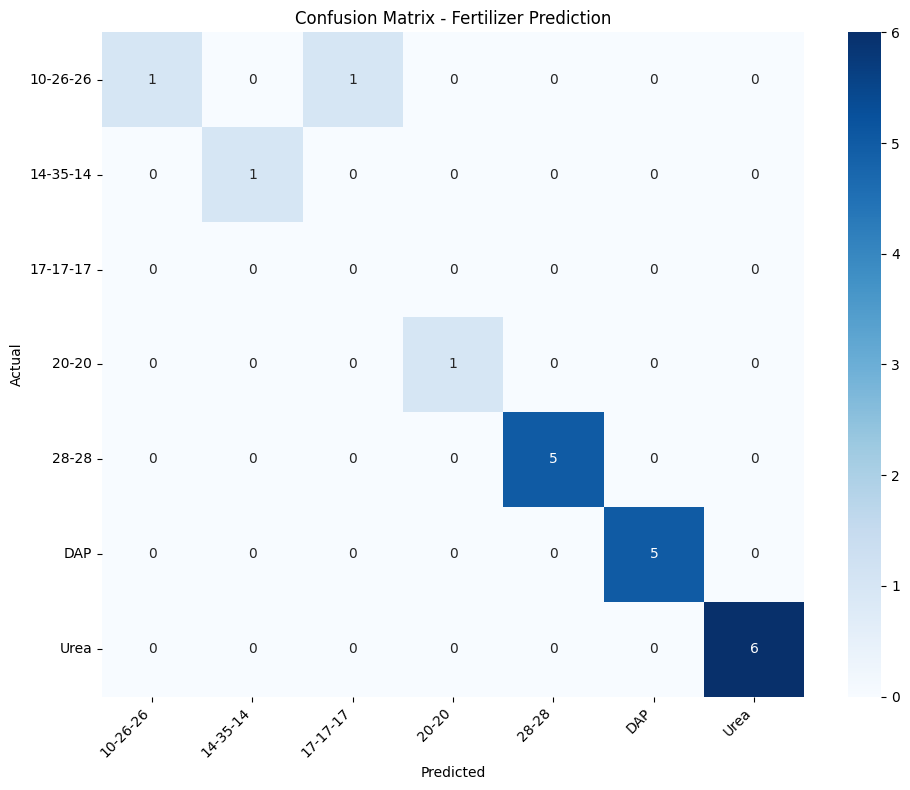

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load Data from CSV File ---
try:
    # Make sure the file name is exactly 'Fertilizer Prediction.csv'
    df = pd.read_csv('/content/Fertilizer Prediction.csv')
    print("✅ CSV file loaded successfully!")
    print("\n--- Columns in this file are: ---")
    print(df.columns.tolist()) # Shows the exact column names
    print("\n")

except FileNotFoundError:
    print("❌ Error: The file 'Fertilizer Prediction.csv' was not found.")
    df = None

# Proceed only if dataframe loaded successfully
if df is not None:
    # --- 2. Data Preprocessing ---
    # CORRECTED: Use 'Fertilizer Name' (with a space)
    X = df.drop('Fertilizer Name', axis=1)
    y = df['Fertilizer Name']

    # CORRECTED: Use 'Crop Type' (with a space)
    crop_encoder = LabelEncoder()
    if 'Crop Type' in X.columns:
        X['Crop Type'] = crop_encoder.fit_transform(X['Crop Type'])

    # CORRECTED: Also handle 'Soil Type' which is categorical
    soil_encoder = LabelEncoder()
    if 'Soil Type' in X.columns:
        X['Soil Type'] = soil_encoder.fit_transform(X['Soil Type'])

    fertilizer_encoder = LabelEncoder()
    y = fertilizer_encoder.fit_transform(y)

    # --- 3. Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # --- 4. Model Training ---
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("✅ Model trained successfully!")

    # --- 5. Model Evaluation ---
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Get all unique labels present in the test and prediction sets
    all_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Get the corresponding class names for the labels
    class_names = [fertilizer_encoder.classes_[i] for i in all_labels]

    report = classification_report(
        y_test,
        y_pred,
        labels=all_labels,
        target_names=class_names,
        zero_division=0
    )

    print(f"\n✅ Model Accuracy: {acc * 100:.2f}%")
    print("\n📊 Classification Report:")
    print(report)

    # --- 6. Visualize Confusion Matrix ---
    print("\n📊 Confusion Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Fertilizer Prediction')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')